In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.ticker as ticker
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv("../data/mouse_drug_data.csv")
clinical = pd.read_csv("../data/clinicaltrial_data.csv")
# Combine the data into a single dataset
data = pd.merge(mouse, clinical, on="Mouse ID")
# Display the data table for preview
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = data[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
df_mean_volume = pd.DataFrame(tumor_response).reset_index()
# Preview DataFrame
df_mean_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
df_change = pd.DataFrame(data[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"]).sem())
# Preview DataFrame
df_change.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
drug_data = pd.DataFrame(tumor_response.reset_index())
drug_data = drug_data.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked
drug_data = pd.DataFrame(drug_data)
drug_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


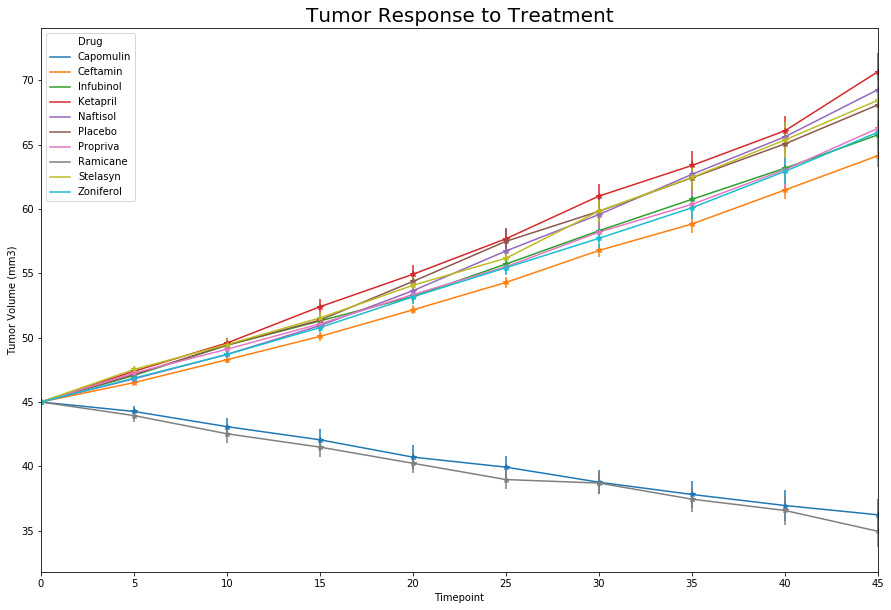

In [5]:
# Generate the Plot (with Error Bars)
standard_error = df_change.reset_index()
standard_error = standard_error.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
drugs = data.sort_values("Drug")
drugs = drugs["Drug"].unique()
drug_data.plot(figsize=(15,10), label=drugs)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment", size=20)
timepoints = [data["Timepoint"].unique()]
for vals in drug_data:
    plt.errorbar(x=drug_data.index, y=drug_data[vals], yerr=standard_error[vals], fmt='*')
# Save the Figure
plt.savefig("../graphs/tumor_response_to_treatment.png")

# Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
metastats = pd.DataFrame(data[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).mean())
# Preview DataFrame
metastats.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
ste_metastats = pd.DataFrame(data[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).sem())
# Preview DataFrame
ste_metastats.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastats = pd.DataFrame(metastats.reset_index())
metastats = metastats.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
ste_metastats = pd.DataFrame(ste_metastats.reset_index())
ste_metastats = ste_metastats.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
metastats.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [9]:
ste_metastats.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


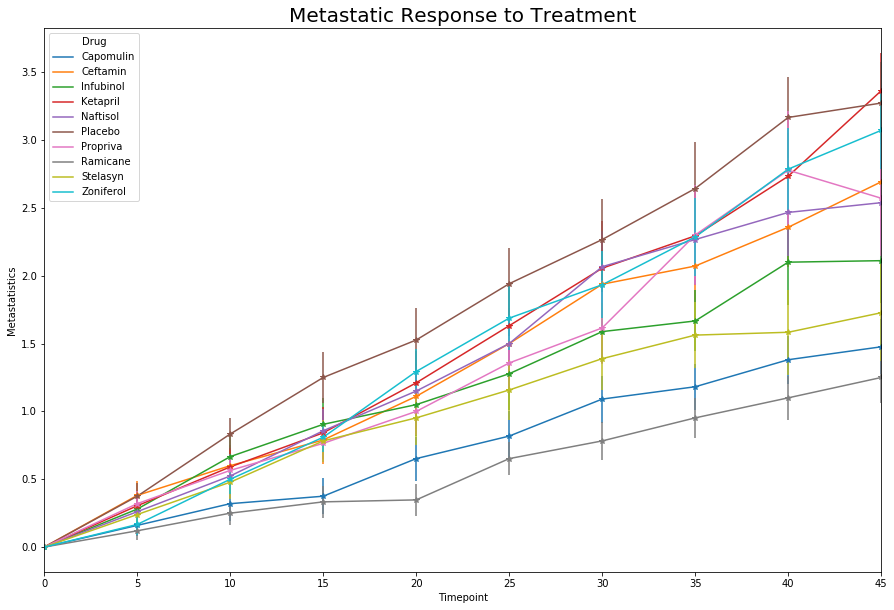

In [10]:
# Generate the Plot (with Error Bars)
metastats.plot(figsize=(15,10), label=drugs)
plt.xlabel("Timepoint")
plt.ylabel("Metastatistics")
plt.title("Metastatic Response to Treatment", size=20)
timepoints = [data["Timepoint"].unique()]
for vals in metastats.columns:
    plt.errorbar(x=drug_data.index, y=metastats[vals], yerr=ste_metastats[vals], fmt='*')
# Save the Figure
plt.savefig("../graphs/metastatistic_response_to_treatment.png")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_count = pd.DataFrame(data[["Drug", "Timepoint"]])
mouse_count["Mouse Count"] = data["Mouse ID"].count()
mouse_count = mouse_count.groupby(["Drug", "Timepoint"]).count().reset_index()
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
# Preview the Data Frame
mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


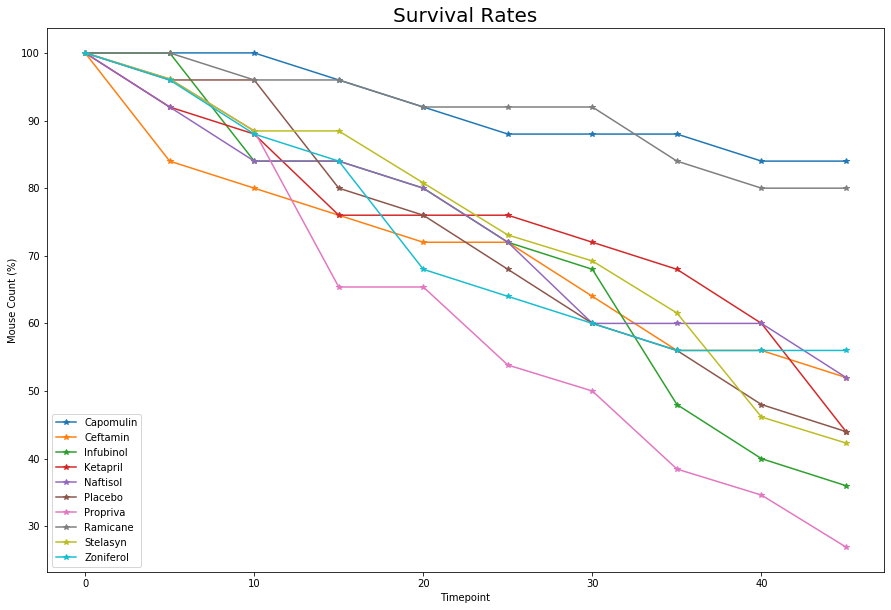

In [13]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(15,10))
for column in mouse_count.columns:
    total=mouse_count[column][0]
    percent=mouse_count[column]/total*100
    plt.plot(mouse_count.index, percent, label=column, marker='*')
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Mouse Count (%)")
plt.title("Survival Rates", size=20)
# Save the Figure
plt.savefig("../graphs/survival_rates.png")

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_change = (drug_data.iloc[9,:] - drug_data.iloc[0,:])/drug_data.iloc[0,:]
# Display the data to confirm
percent_change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

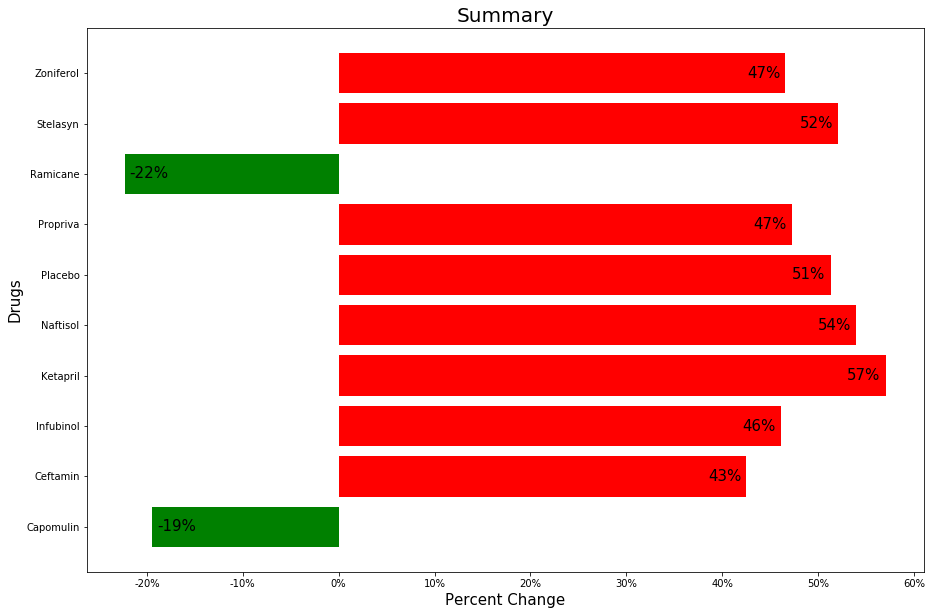

In [15]:
# Store all Relevant Percent Changes into a Tuple
percentage = tuple(percent_change)
drugs = tuple(drugs)
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(drugs, percentage,
        color=['red' if percentage[value] > 0 else 'green' for value in np.arange(len(drugs))])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.xlabel("Percent Change", size=15)
plt.ylabel("Drugs", size=15)
plt.title("Summary", size=20)
# Use functions to label the percentages of changes
def percent(ax, spacing=-5):
    rect = ax.patches
    for rect in ax.patches:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = spacing
        ha = "right"
        if x_value < 0:
            ha = "left"
            space *= -1
        label = "{:.0%}".format(x_value)
        ax.annotate(label, (x_value, y_value), xytext=(space, 0),
                    textcoords="offset points", ha=ha, va="center", size=15)
# Call functions to implement the function calls
percent(ax)
# Save the Figure
plt.savefig("../graphs/summary.png")